# Stefan-Boltzmann Constant
## Example 10 from NIST Uncertainty Machine Manual

Reference: https://www.nist.gov/publications/uncertainty-machine-users-manual

In this example, the function is defined as a sympy expression instead of a string.


In [1]:
import suncal
import numpy as np
import sympy

In [2]:
# Using sympy to build the expression. Note use of latex-style notations for subscripts
# and greek letters (alpha) converting to symbols
h, R, Rinf, Are, Mu, c, alpha = sympy.symbols('h R, R_inf A_r M_u c, alpha')
num = 32 * sympy.pi**5 * h * R**4 * Rinf**4
denom = 15 * Are**4 * Mu**4 * c**6 * alpha**8
sigma = num/denom
display(sigma)

32*pi**5*R**4*R_inf**4*h/(15*A_r**4*M_u**4*alpha**8*c**6)

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 5.670372e-08 W/K⁴/m²  | 2.0e-13 W/K⁴/m²           | ± 4.0e-13 W/K⁴/m²     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 5.670372e-08 W/K⁴/m²  | 2.0e-13 W/K⁴/m²           | (5.670332e-08 W/K⁴/m², 5.670413e-08 W/K⁴/m²) | 1.959     | -             |

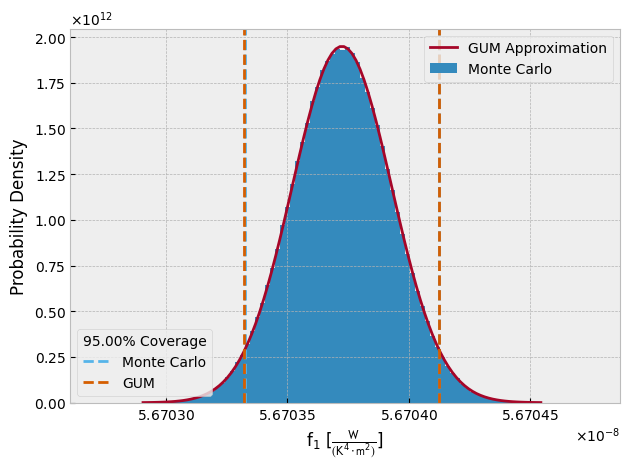

In [3]:
u = suncal.Model(sigma)

# Mu and c have 0 uncertainty. Just add their nominal values
u.var('M_u').measure(1E-3, units='kg/mol')
u.var('c').measure(299792458, units='m/s')

# Remaining inputs use values from Table 4
u.var('h').measure(6.62606957E-34, units='J s').typeb(name='u(h)', std=.00000029E-34)
u.var('R').measure(8.3144621, units='J/mol/K').typeb(name='u(R)', std=.0000075)
u.var('R_inf').measure(10973731.568539, units='m^-1').typeb(name='u(Rinf)', std=.000055)
u.var('A_r').measure(5.4857990946E-4, units='dimensionless').typeb(name='u(A_r)', std=.0000000022E-4)  # This is *relative* atomic mass, unitless
u.var('alpha').measure(7.2973525698e-3, units='dimensionless').typeb(name='u(alpha)', std=.0000000024E-3)

result = u.calculate().units(f1='W m^-2 K^-4')
display(result)
result.report.plot.pdf(interval=.95)

In [4]:
result.report.variables.summary()

|Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description  |
|----------|---------|------------------|--------------|-------------|
|$A_{r}$   | 0.0005485799095   | 2.2e-13            | inf       |              |
|$M_{u}$   | 0.0010 kg/mol  | 0.0 kg/mol           | inf       |              |
|$R$   | 8.3144621 J/K/mol  | 7.5e-06 J/K/mol           | inf       |              |
|$R_{inf}$   | 1.097373157e+07 1/m  | 0.000055 1/m          | inf      |              |
|$\alpha$   | 0.007297352570  | 2.4e-12           | inf      |              |
|$c$   | 2.997924580e+08 m/s | 0.0 m/s          | inf      |              |
|$h$   | 6.62606957e-34 J·s | 2.9e-41 J·s          | inf      |              |

In [5]:
result.report.expanded()

### GUM Approximation


|Function   | Level of Confidence   | Minimum   | Maximum   | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|---------------------|---------|---------|---------|--------------|----------------------|
|$f_{1}$   | 95.00%                | 5.7e-08 W/K⁴/m²  | 5.7e-08 W/K⁴/m²  | 1.960     | inf            | 4.0e-13 W/K⁴/m²              |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Level of Confidence   | Minimum   | Maximum   | Coverage Factor  |
|----------|---------------------|---------|---------|-----------------|
|$f_{1}$   | 95.00%                | 5.7e-08 W/K⁴/m²  | 5.7e-08 W/K⁴/m²  | 1.959            |